<a href="https://colab.research.google.com/github/visiodepsp-lgtm/mlops-final-project/blob/main/PROYECTO_FINAL_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import joblib

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
print("Shape del dataset:", df.shape)
df.head()

Shape del dataset: (100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.info

<bound method DataFrame.info of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]>

In [5]:
df.describe

<bound method NDFrame.describe of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]>

In [6]:
df["hypertension"]

,hypertension
0,0
1,0
2,0
3,0
4,1
...,...
99995,0
99996,0
99997,0
99998,0


In [7]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [8]:
from sklearn.model_selection import train_test_split
X=df.drop('diabetes', axis=1)
y=df['diabetes']
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify=y, random_state=42)

In [9]:
X_tr.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0


In [10]:
num_features = [
    "age", "bmi", "HbA1c_level", "blood_glucose_level",
   # "danger", "some_ratio"
]
bin_features = [
    "hypertension", "heart_disease"
]
cat_features=[
    "gender", "smoking_history"
]
new_features=[]

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        #('feat', FunctionTransformer(feature_engineer, validate=False), X_tr[num_features]),
        ("num", MinMaxScaler(), num_features),
        ("onehot", OneHotEncoder(handle_unknown='ignore'),cat_features),
        ("bin", "passthrough", bin_features)

    ]
)

In [13]:
from sklearn.linear_model import LogisticRegression
log_model = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(
            class_weight="balanced",
            max_iter=1000,
            penalty="l2",
            C=0.5
        ))
    ]
)

In [14]:
log_model.fit(X_tr, y_tr)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender',
                                                   'smoking_history']),
                                                 ('bin', 'passthrough',
                                                  ['hypertension',
                                                   'heart_disease'])])),
                ('model',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=1000))])

TESTING MODEL

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = log_model.predict(X_val)
#y_1 = log_model.predict(X)
y_proba = log_model.predict_proba(X_val)[:,1]
y_1_proba = log_model
print(f"Total test set size: {len(y_val)}")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Total test set size: 20000
Accuracy: 0.88855
[[16254  2046]
 [  183  1517]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.43      0.89      0.58      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000



In [16]:
import numpy as np
thresh_no=0.4
custom_pred = (y_proba >= thresh_no).astype(int)
mo=(confusion_matrix(y_val, custom_pred))
tn, fp, fn, tp = confusion_matrix(y_val, custom_pred).ravel()
print(f"Test size: {len(y_val)}")
print(mo)
print("how much of the reported positive cases are actually +ve ? ")
print(f"positive accur: {mo[1][1]/(mo[0][1] + mo[1][1]) *100}%")
print("how much of the reported negative cases are actually negative?")
print(f"neg accur: {mo[0][0]/(mo[1][0] + mo[0][0]) *100}%")

Test size: 20000
[[15541  2759]
 [  133  1567]]
how much of the reported positive cases are actually +ve ? 
positive accur: 36.222838650023114%
how much of the reported negative cases are actually negative?
neg accur: 99.15146101824678%


In [17]:
import matplotlib.pyplot as plt

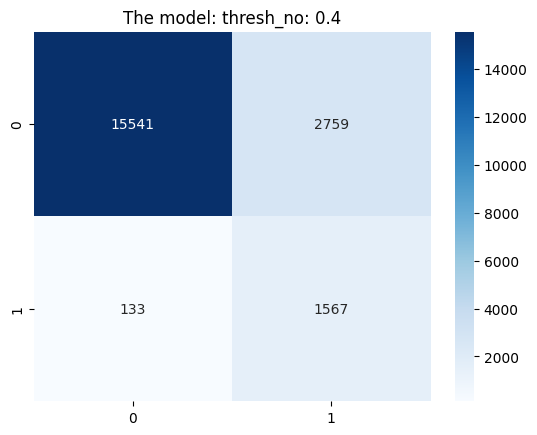

In [18]:
import seaborn as sns

cm = confusion_matrix(y_val,custom_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"The model: thresh_no: {thresh_no}")
plt.show()

In [19]:
proba = log_model.predict_proba(X_val)[:,1]
thresholds = np.linspace(0, 1, 100)

fps, fns = [], []


for t in thresholds:
    preds = (proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, preds).ravel()

    fps.append(fp)
    fns.append(fn)
ppv, npv = [], []

for t in thresholds:
    preds = (proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, preds).ravel()

    ppv.append(tp / (tp + fp) if (tp + fp) > 0 else np.nan)
    npv.append(tn / (tn + fn) if (tn + fn) > 0 else np.nan)

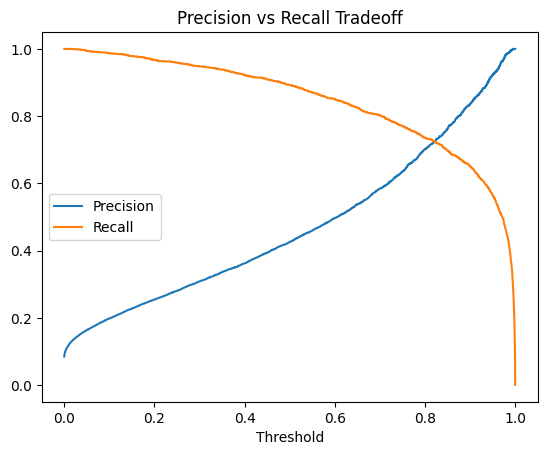

In [20]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
prec, rec, thresh = precision_recall_curve(y_val, y_proba)

plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision vs Recall Tradeoff")
plt.show()

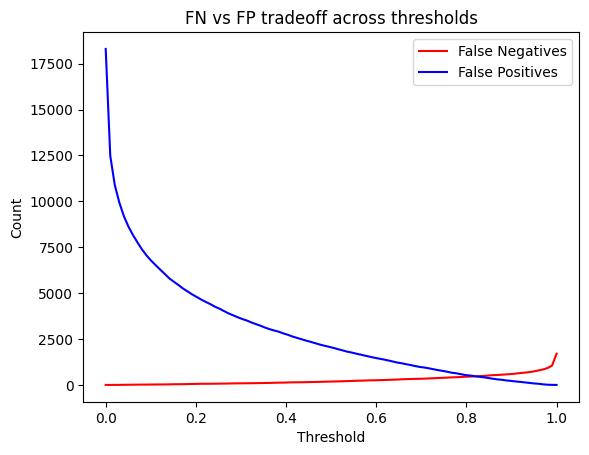

In [21]:
plt.plot(thresholds, fns, label="False Negatives", color="red")
plt.plot(thresholds, fps, label="False Positives", color="blue")
plt.xlabel("Threshold")
plt.ylabel("Count")
plt.title("FN vs FP tradeoff across thresholds")
plt.legend()
plt.show()

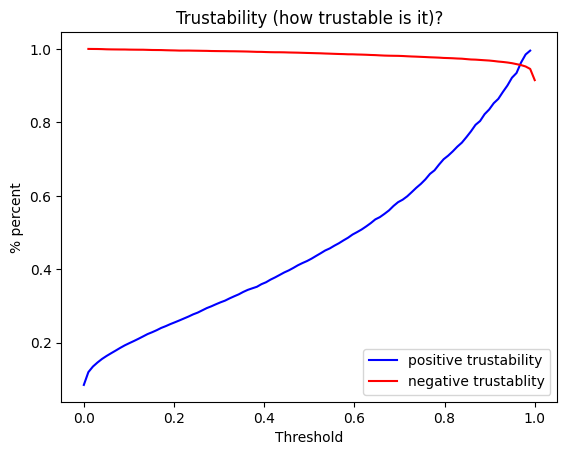

In [22]:
plt.plot(thresholds, ppv, label="positive trustability", color="blue")
plt.plot(thresholds, npv, label="negative trustablity", color="red")
plt.xlabel("Threshold")
plt.ylabel("% percent")
plt.title("Trustability (how trustable is it)?")
plt.legend()
plt.show()

Conclusion: This model with thresh_no with 0.4 rapidly reduces the number of False Negatives detected however it is extremely poor in detecting Positive. Meaning you can use this model to judge if a person is healthy or not (extremely less false negatives) but not to see if a person actually has diabetes

In [23]:
from sklearn.metrics import roc_auc_score

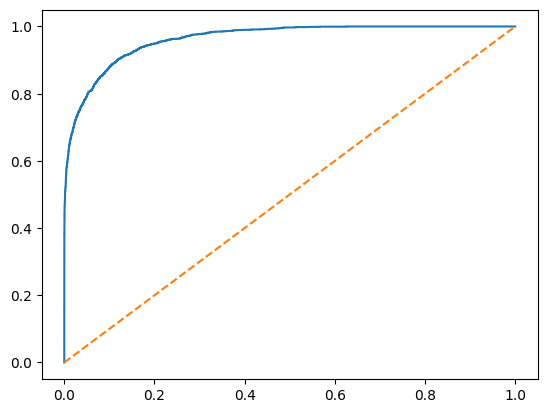

In [24]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.show()

In [25]:
roc_auc = roc_auc_score(y_val, y_proba)
print("\nROC-AUC:", roc_auc)


ROC-AUC: 0.9629212954034072


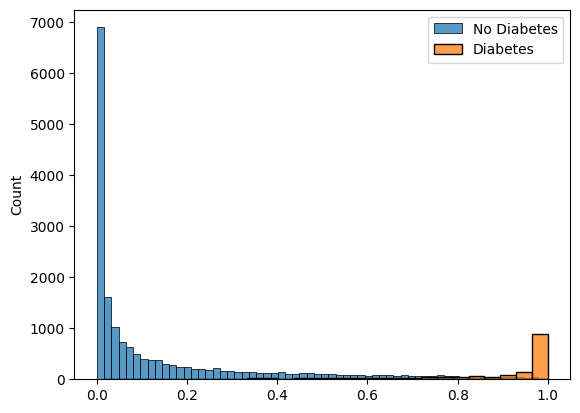

In [26]:
sns.histplot(proba[y_val==0], label="No Diabetes")
sns.histplot(proba[y_val==1], label="Diabetes")
plt.legend()
plt.show()

PREDICTING SOMEONES STATUS DIRECTLY

In [27]:
df['smoking_history'].unique()


array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [28]:
FEATURES = [
    "gender",
    "age",
    "hypertension",
    "heart_disease",
    "smoking_history",
    "bmi",
    "HbA1c_level",
    "blood_glucose_level"
]

In [29]:
def predict_from_list(model, input_list, threshold=0.4):
    """
    input_list: list of feature values in correct order
    """
    X = pd.DataFrame([input_list], columns=FEATURES)

    proba = model.predict_proba(X)[0, 1]
    pred = int(proba >= threshold)

    print("Prediction:", "Diabetic" if pred == 1 else "Non-diabetic")
    print(f"Risk probability: {proba:.3f}")

    return pred, proba

In [30]:
customer = [
    "female",     # gender
    43,         # age
    0,          # hypertension
    0,          # heart_disease
    "never",   # smoking_history
    29.9,       # bmi
    5.4,        # HbA1c
    92.6         # blood_glucose
]
X_1 = pd.DataFrame([customer], columns=FEATURES)
#predict_from_list(log_model, customer)
y_1 = log_model.predict_proba(X_1)[0,1]
y_1_p = int(y_1 >= 0.4)
y_1_p

0

IMPROVE ACCURACY:
So we have a Baseline Log Regression model but we need to improve the accuracy of th emodel we have to understand the data even more actually. More importantly understand cases where th elog regression might fail:

Unexpected correlations between independent variables
Unexpected outliers can pull the curve
Scaling (trying Robust Scaler)
Feature engineering Lets help the model undertand more about the data that it otherwise cannot predict:

SOME IDEAS

In [31]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [32]:
df[num_features].corr()

,age,bmi,HbA1c_level,blood_glucose_level
age,1.000000,0.337396,0.101354,0.110672
bmi,0.337396,1.000000,0.082997,0.091261
HbA1c_level,0.101354,0.082997,1.000000,0.166733
blood_glucose_level,0.110672,0.091261,0.166733,1.000000


<Axes: >

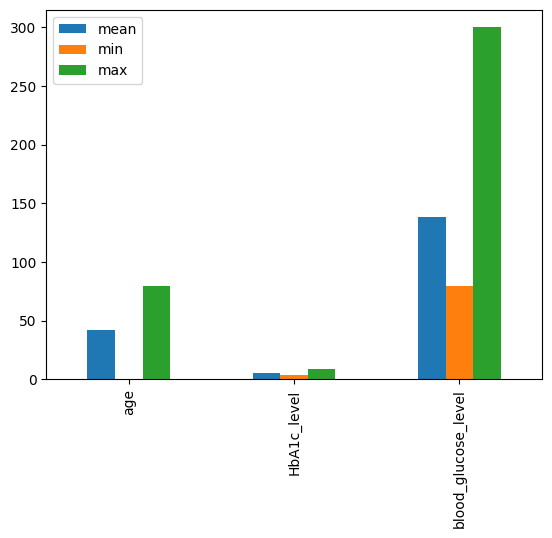

In [33]:
# The "all-in-one" info plot
df[['age', 'HbA1c_level', 'blood_glucose_level']].describe().T[['mean', 'min', 'max']].plot(kind='bar')

In [34]:
df[df['age']<1].count()

,0
gender,911
age,911
hypertension,911
heart_disease,911
smoking_history,911
bmi,911
HbA1c_level,911
blood_glucose_level,911
diabetes,911


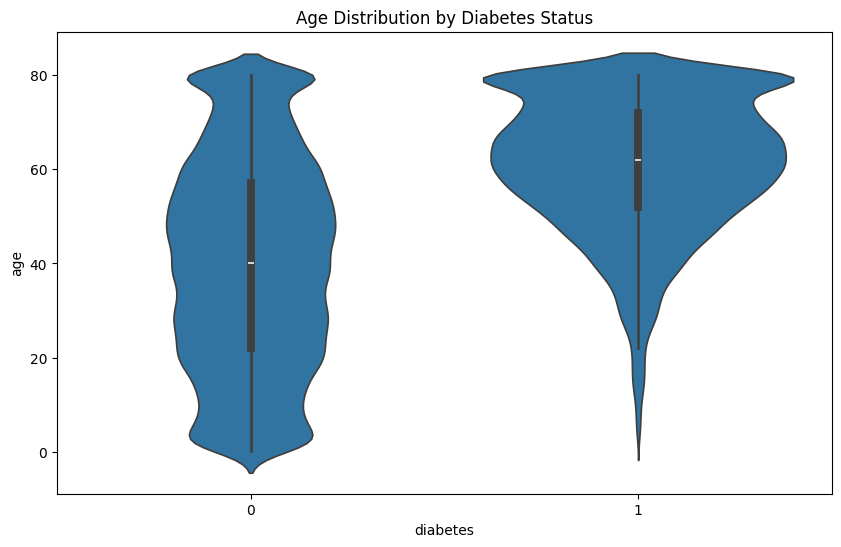

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='age', data=df)
plt.title("Age Distribution by Diabetes Status")
plt.show()

In [36]:
babies = df[df['age'] < 1]
print(babies[['blood_glucose_level', 'HbA1c_level', 'diabetes']].describe())

       blood_glucose_level  HbA1c_level  diabetes
count           911.000000   911.000000     911.0
mean            132.970362     5.355214       0.0
std              34.010700     0.990045       0.0
min              80.000000     3.500000       0.0
25%             100.000000     4.500000       0.0
50%             140.000000     5.700000       0.0
75%             158.000000     6.100000       0.0
max             200.000000     6.600000       0.0


In [37]:
df= df.drop_duplicates()

In [38]:
df.duplicated().sum()

np.int64(0)

In [43]:
np.int64(0)
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

We use this pipeline function to implement any feature engineering *this function makes it easier to implement and check the effectiveness of features were introducing:

In [44]:
num_features = [
    "age", "bmi", "HbA1c_level", "blood_glucose_level", "danger",#, "some_ratio"
   # "high_hba1c"
    "bmi_age","bmi_sqrd"
]

bin_features = [
    "hypertension", "heart_disease","high_hba1c", "high_glucose", #"obese",
    "metabolic_risk", "cardio_risk"
]

cat_features = [
    "gender", "smoking_history"
]

# -----------------------------
# optional feature engineering
# -----------------------------
def feature_engineer(X):
    X = X.copy()
    # Uncomment ONLY if you want to test them
    #also make sure to include/remove features from the list above!
    X["danger"] = X["hypertension"] * X["bmi"]
   # X["some_ratio"] = X["blood_glucose_level"] / X["HbA1c_level"]
    X["high_hba1c"] = (X["HbA1c_level"] >= 6.5).astype(int)
    X["high_glucose"] = (X["blood_glucose_level"] >= 200).astype(int)
    X["obese"] = (X["bmi"] >= 30).astype(int)
    X["bmi_age"] = X["bmi"]/X["age"]
    # Meaningful interactions
    X["metabolic_risk"] = X["high_hba1c"] * X["obese"]
    X["cardio_risk"] = X["hypertension"] * X["heart_disease"]
    X["bmi_sqrd"] = (X["bmi"])**2

    return X

# -----------------------------
# preprocessing
# -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_features),
        ("bin", "passthrough", bin_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features)
    ],
    remainder="drop"
)

# -----------------------------
# full model pipeline
# -----------------------------
log_model = Pipeline(
    steps=[
        ("feat", FunctionTransformer(feature_engineer, validate=False)),
        ("preprocess", preprocessor),
        ("model", LogisticRegression(
            class_weight="balanced",
            max_iter=1000,
            penalty="l2",
            C=0.5
        ))
    ]
)

# -----------------------------
# fit
# -----------------------------
log_model.fit(X_tr, y_tr)

Pipeline(steps=[('feat',
                 FunctionTransformer(func=<function feature_engineer at 0x79185af24220>)),
                ('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'danger', 'bmi_age',
                                                   'bmi_sqrd']),
                                                 ('bin', 'passthrough',
                                                  ['hypertension',
                                                   'heart_disease',
                                                   'high_hba1c', 'high_glucose',
                                                   'metabolic_risk',
                                                   'cardio_risk']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('model',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=1000))])

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = log_model.predict(X_val)
#y_1 = log_model.predict(X)
y_proba = log_model.predict_proba(X_val)[:,1]
y_1_proba = log_model
print(f"Total test set size: {len(y_val)}")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Total test set size: 20000
Accuracy: 0.88695
[[16206  2094]
 [  167  1533]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     18300
           1       0.42      0.90      0.58      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.90     20000



In [46]:
import numpy as np
thresh_no=0.4
custom_pred = (y_proba >= thresh_no).astype(int)
mo=(confusion_matrix(y_val, custom_pred))
tn, fp, fn, tp = confusion_matrix(y_val, custom_pred).ravel()
print(f"Test size: {len(y_val)}")
print(mo)
print("how much of the reported positive cases are actually +ve ? ")
print(f"positive accur: {mo[1][1]/(mo[0][1] + mo[1][1]) *100}%")
print("how much of the reported negative cases are actually negative?")
print(f"neg accur: {mo[0][0]/(mo[1][0] + mo[0][0]) *100}%")

Test size: 20000
[[15514  2786]
 [  120  1580]]
how much of the reported positive cases are actually +ve ? 
positive accur: 36.18873110398534%
how much of the reported negative cases are actually negative?
neg accur: 99.23244211334271%



EDA and FEATURE ENGINEERING

In [47]:
print(y.value_counts(normalize=True))

diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


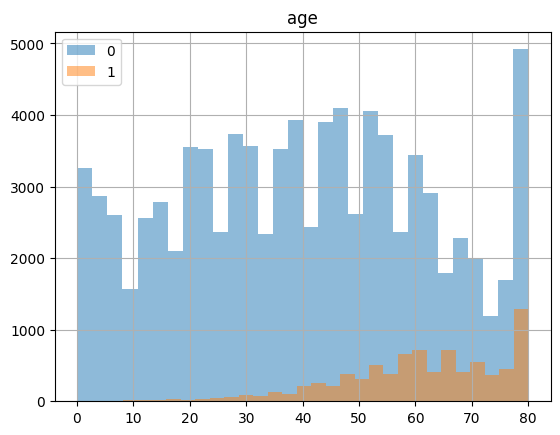

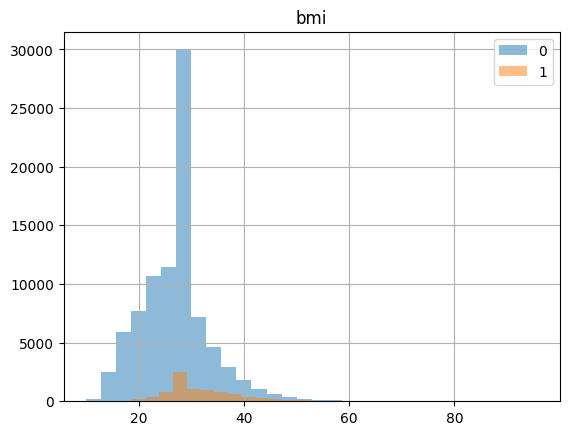

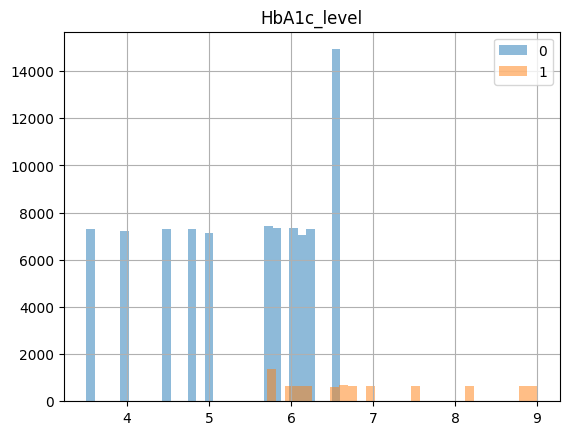

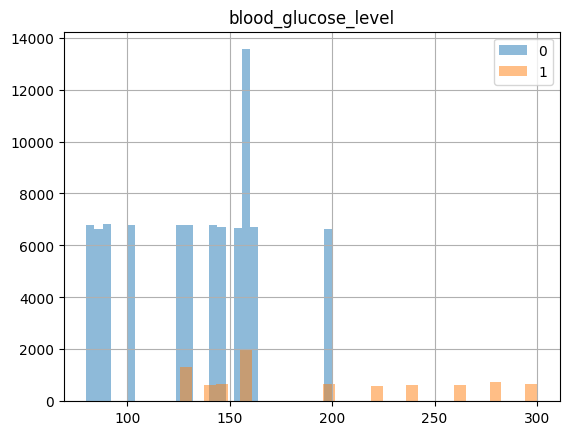

In [48]:
num_features = [
    "age", "bmi", "HbA1c_level", "blood_glucose_level", #"danger",#, "some_ratio"
   # "high_hba1c"
]
for col in num_features:
    df[df["diabetes"]==0][col].hist(alpha=0.5, bins=30, label="0")
    df[df["diabetes"]==1][col].hist(alpha=0.5, bins=30, label="1")
    plt.title(col)
    plt.legend()
    plt.show()

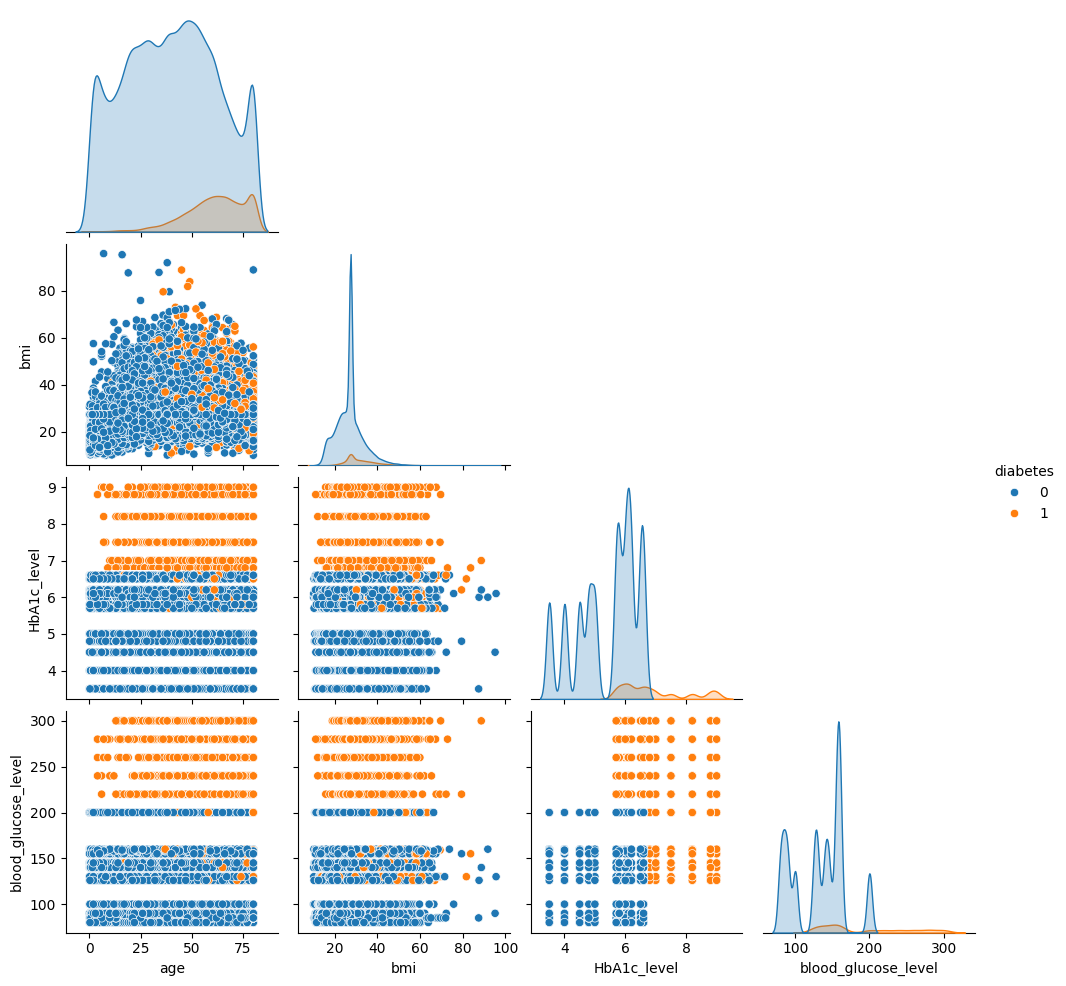

In [49]:
sns.pairplot(
    df[["age","bmi","HbA1c_level","blood_glucose_level","diabetes"]],
    hue="diabetes",
    corner=True
)

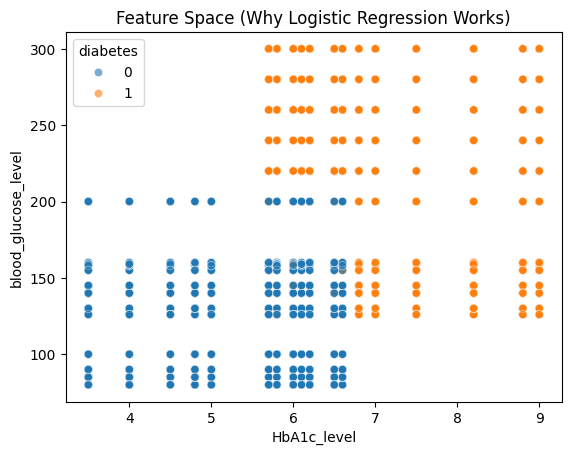

In [50]:
sns.scatterplot(
    data=df,
    x="HbA1c_level",
    y="blood_glucose_level",
    hue="diabetes",
    alpha=0.6
)
plt.title("Feature Space (Why Logistic Regression Works)")
plt.show()

/tmp/ipython-input-262/2690446344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hba1c_bin"] = pd.cut(df["HbA1c_level"], bins=[4,5.7,6.5,9])


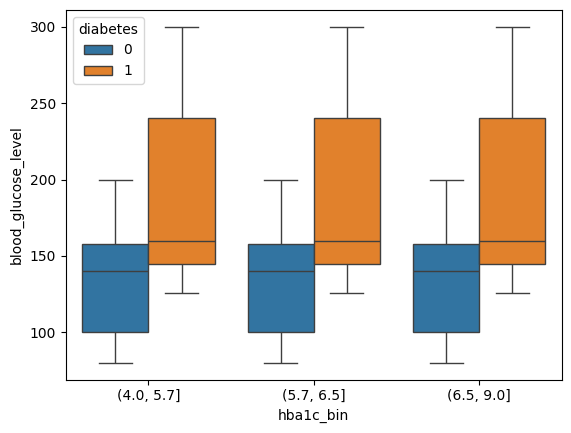

In [51]:
df["hba1c_bin"] = pd.cut(df["HbA1c_level"], bins=[4,5.7,6.5,9])

sns.boxplot(
    x="hba1c_bin",
    y="blood_glucose_level",
    hue="diabetes",
    data=df
)
plt.show()

There is absolutely not very important correlation between smoking and hypertension in determining diabetes or not.
So our model just really depends on HbA1C and blood glucose levels actually, maybe BMI AGE can play moderate importance here.
Not much influence of genders here

/tmp/ipython-input-262/1260645215.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hypertension"] = df["hypertension"].astype(int)
/tmp/ipython-input-262/1260645215.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["heart_disease"] = df["heart_disease"].astype(int)
/tmp/ipython-input-262/1260645215.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

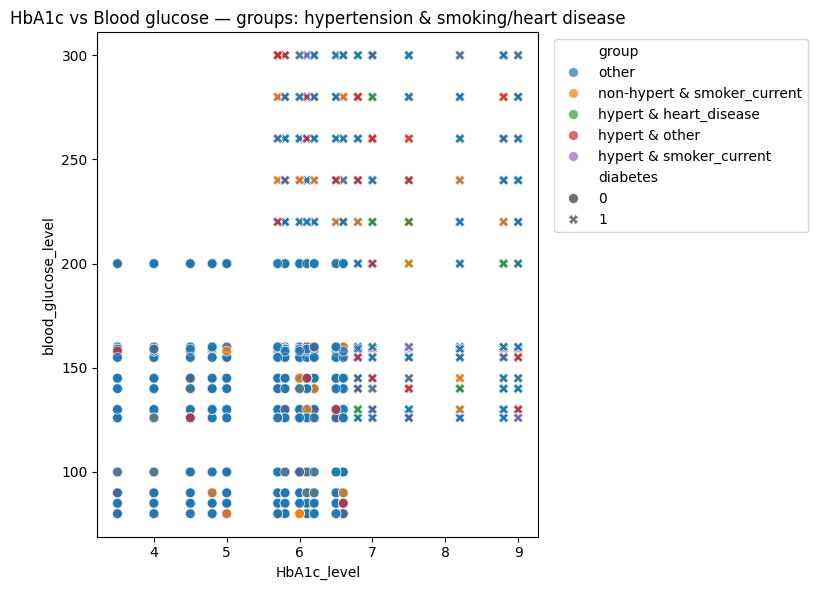

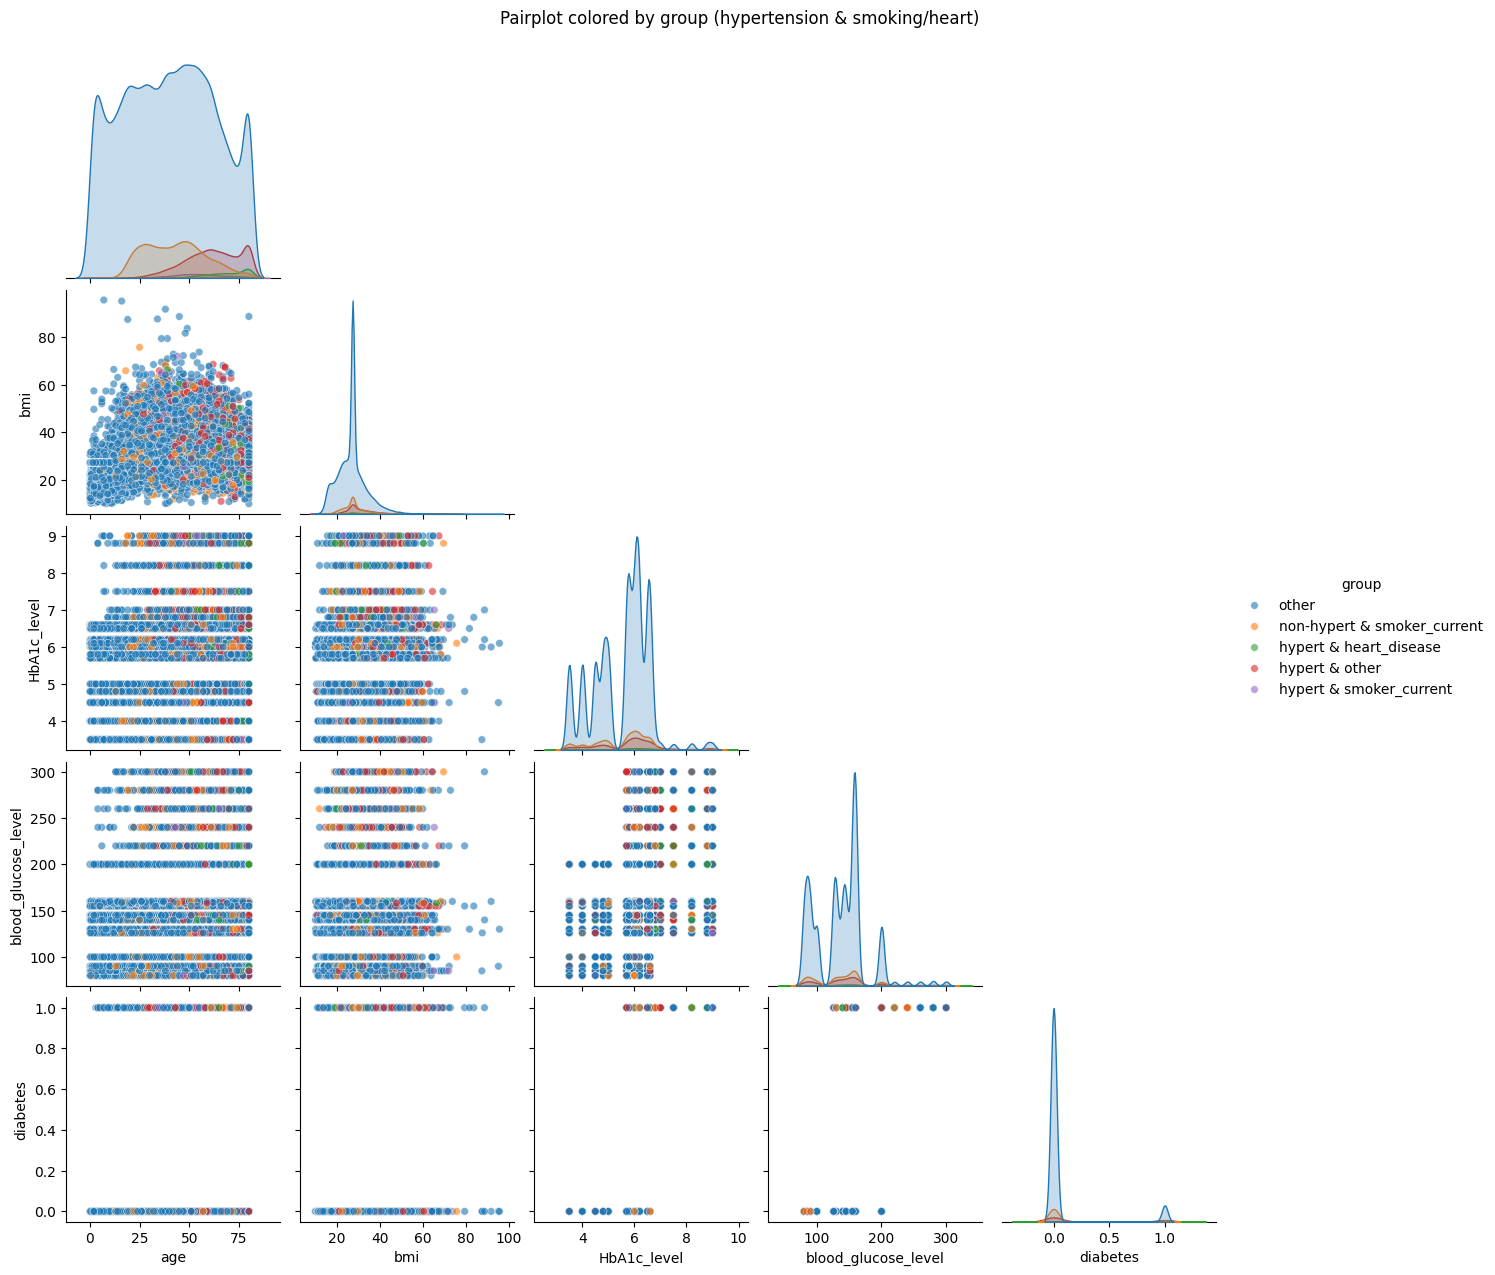

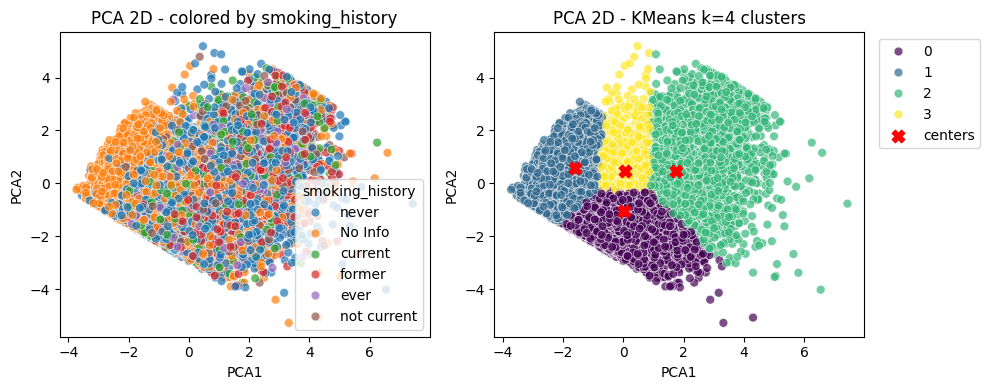

Smoking history frequency per cluster (rows sum to 1):
col_0               0     1     2     3
smoking_history                        
No Info          0.25  0.38  0.11  0.26
current          0.36  0.09  0.17  0.38
ever             0.39  0.06  0.21  0.33
former           0.42  0.03  0.32  0.23
never            0.34  0.16  0.19  0.31
not current      0.37  0.12  0.21  0.30


In [52]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ---------- quick safety casts ----------
# make sure columns exist and types are sane
for col in ["HbA1c_level","blood_glucose_level","bmi","age",
            "hypertension","heart_disease","gender","smoking_history","diabetes"]:
    if col not in df.columns:
        raise ValueError(f"missing column: {col}")

# ensure binary columns are 0/1 ints
df["hypertension"] = df["hypertension"].astype(int)
df["heart_disease"] = df["heart_disease"].astype(int)
# smoking_history assumed categorical strings like 'current','former',...
df["smoking_history"] = df["smoking_history"].astype(str)

# ---------- Create groups you requested ----------
# group A = hypertensive & CURRENT smoker
# group B = hypertensive & heart_disease (example second variable)
# group C = hypertensive & (not current smoker and no heart disease)
# group D = others
df["group"] = "other"
df.loc[(df["hypertension"]==1) & (df["smoking_history"]=="current"), "group"] = "hypert & smoker_current"
df.loc[(df["hypertension"]==1) & (df["heart_disease"]==1), "group"] = "hypert & heart_disease"
df.loc[(df["hypertension"]==1) & (df["smoking_history"]!="current") & (df["heart_disease"]==0), "group"] = "hypert & other"
# optional: if you want non-hypertensive smokers too
df.loc[(df["hypertension"]==0) & (df["smoking_history"]=="current"), "group"] = "non-hypert & smoker_current"

# ---------- Plot 1: HbA1c vs Glucose with groups ----------
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="HbA1c_level",
    y="blood_glucose_level",
    hue="group",
    style="diabetes",        # shape by true label (0/1) to see distribution of errors
    alpha=0.7,
    s=50
)
plt.title("HbA1c vs Blood glucose — groups: hypertension & smoking/heart disease")
plt.xlabel("HbA1c_level")
plt.ylabel("blood_glucose_level")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# ---------- Plot 2: Pairwise scatter but colored by the same groups ----------
cols = ["age","bmi","HbA1c_level","blood_glucose_level"]
sns.pairplot(df[cols + ["group","diabetes"]], hue="group", corner=True, plot_kws={'alpha':0.6, 's':30})
plt.suptitle("Pairplot colored by group (hypertension & smoking/heart)", y=1.02)
plt.show()

# ---------- Unsupervised test: do smoking groups align with clusters? ----------
# select numeric features and standardize
X = df[["age","bmi","HbA1c_level","blood_glucose_level"]].fillna(0).values
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# reduce to 2D for plotting (PCA)
pca = PCA(n_components=2)
X2 = pca.fit_transform(Xs)

# KMeans clusters (choose k = 3 or 4)
k = 4
km = KMeans(n_clusters=k, random_state=42)
clusters = km.fit_predict(X2)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=df["smoking_history"], palette="tab10", alpha=0.7, s=40)
plt.title("PCA 2D - colored by smoking_history")
plt.xlabel("PCA1"); plt.ylabel("PCA2")

plt.subplot(1,2,2)
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=clusters, palette="viridis", alpha=0.7, s=40)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red', s=80, marker='X', label='centers')
plt.title(f"PCA 2D - KMeans k={k} clusters")
plt.xlabel("PCA1"); plt.ylabel("PCA2")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()

# ---------- Quick cross-tab to measure alignment ----------
ct = pd.crosstab(df["smoking_history"], clusters, normalize='index')
print("Smoking history frequency per cluster (rows sum to 1):")
print(ct.round(2))

/tmp/ipython-input-262/2283821617.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df["HbA1c_level"], 10))["diabetes"].mean().plot()


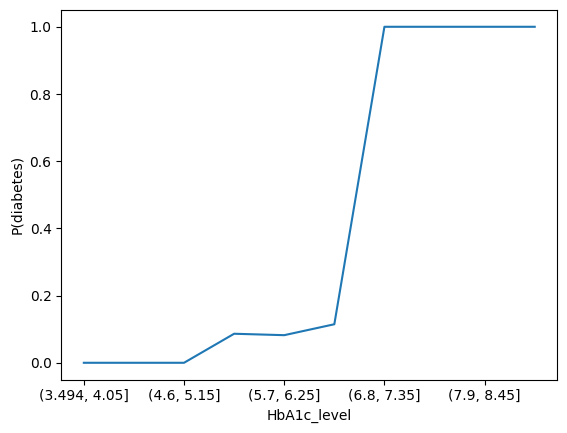

In [53]:
df.groupby(pd.cut(df["HbA1c_level"], 10))["diabetes"].mean().plot()
plt.ylabel("P(diabetes)")
plt.show()

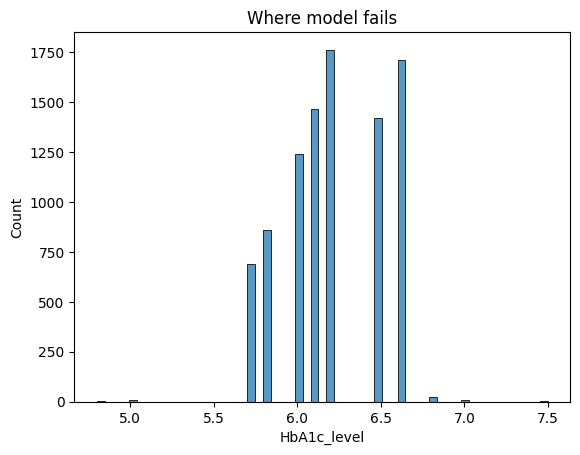

In [54]:
wrong = X_tr[y_tr != log_model.predict(X_tr)]
sns.histplot(wrong["HbA1c_level"])
plt.title("Where model fails")
plt.show()

We notice that when we add mathematically modeled features Either model accuracy decreases or remain stagnant, other stats dont change much.. This is a sign that we have "ceiled" our LR model.

Clearly our logistic regressor model has reached its bottle necks also comparing the pairplots present lets try trees as they are good with categorical data and overall better w.r.t to linear regression

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
X=df.drop('diabetes', axis=1)
y=df['diabetes']
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify=y, random_state=42)

In [57]:
num_features = [
    "age", "bmi", "HbA1c_level", "blood_glucose_level", #"danger",#, "some_ratio"
   # "high_hba1c"
    #"bmi_age","bmi_sqrd"
]

bin_features = [
    "hypertension", "heart_disease",#"high_hba1c", "high_glucose", #"obese",
   # "metabolic_risk", "cardio_risk"
]

cat_features = [
    "gender", "smoking_history"
]

In [58]:
X_tr.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'hba1c_bin', 'group'],
      dtype='object')

In [59]:
def feature_engineer(X):
    X=X.copy()
    return X

In [60]:
num_transforms_1 = ColumnTransformer(
    transformers = [
    ("scaler", MinMaxScaler(), num_features)
    ]
   # remainder="drop"
)

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ("nums", MinMaxScaler(), num_features),
        ("bin", "passthrough", bin_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features)
    ]
)

In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ("nums", MinMaxScaler(), num_features),
        ("bin", "passthrough", bin_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features)
    ]
)

In [65]:
dt_model = Pipeline(
    steps=[
        ("feat", FunctionTransformer(feature_engineer, validate=False)),
        ("preprocess", preprocessor),
        ("model", DecisionTreeClassifier(
            max_depth=5,
            min_samples_leaf=10,
            min_samples_split=20,
            random_state=42
            )
        )
    ]
)
dt_model

Pipeline(steps=[('feat',
                 FunctionTransformer(func=<function feature_engineer at 0x79184f670680>)),
                ('preprocess',
                 ColumnTransformer(transformers=[('nums', MinMaxScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('bin', 'passthrough',
                                                  ['hypertension',
                                                   'heart_disease']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [66]:
dt_model.fit(X_tr, y_tr)

Pipeline(steps=[('feat',
                 FunctionTransformer(func=<function feature_engineer at 0x79184f670680>)),
                ('preprocess',
                 ColumnTransformer(transformers=[('nums', MinMaxScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('bin', 'passthrough',
                                                  ['hypertension',
                                                   'heart_disease']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [67]:
y_preds = dt_model.predict(X_val)

In [68]:
acc = accuracy_score(y_val, y_preds)
print("Accuracy:", acc)

Accuracy: 0.971606864274571


In [69]:
from sklearn.metrics import roc_auc_score

In [70]:
print("Confusion Matrix:\n", confusion_matrix(y_val, y_preds))

print("\nClassification Report:\n")
print(classification_report(y_val, y_preds))

Confusion Matrix:
 [[17534     0]
 [  546  1150]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17534
           1       1.00      0.68      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



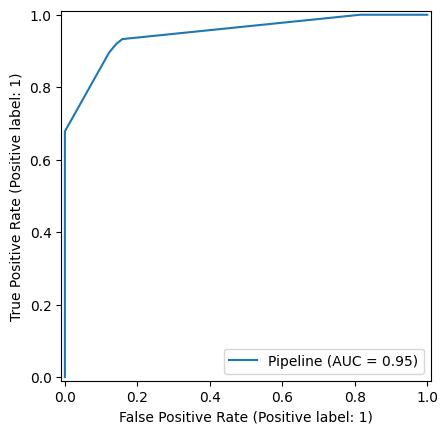

In [71]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt_model, X_val, y_val)

In [72]:
print("Train Accuracy:", dt_model.score(X_tr, y_tr))
print("Test Accuracy:", dt_model.score(X_val, y_val))

Train Accuracy: 0.9705522908107546
Test Accuracy: 0.971606864274571


In [73]:
probs = dt_model.predict_proba(X_val)[:,1]
y_pred_n= (probs >= 0.8).astype(int)

In [74]:
cos = confusion_matrix(y_val, y_pred_n)
cos

array([[17534,     0],
       [  546,  1150]])

Our logistic regression model did much better had higher ROC AUC score than this one an better predicitng stats.

There are problems!

In [75]:
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [76]:
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

In [77]:
cv_results = cross_validate(
    dt_model,
    X_tr,
    y_tr,
    cv=skf,
    scoring=scoring,
    return_train_score=True
)

In [78]:
for metric in scoring.keys():
    mean_score = np.mean(cv_results[f"test_{metric}"])
    std_score = np.std(cv_results[f"test_{metric}"])
    print(f"{metric.upper()}: {mean_score:.4f} (+/- {std_score:.4f})")

ACCURACY: 0.9706 (+/- 0.0009)
PRECISION: 1.0000 (+/- 0.0000)
RECALL: 0.6662 (+/- 0.0096)
F1: 0.7996 (+/- 0.0070)
ROC_AUC: 0.9541 (+/- 0.0037)


In [79]:
log_model

Pipeline(steps=[('feat',
                 FunctionTransformer(func=<function feature_engineer at 0x79185af24220>)),
                ('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'danger', 'bmi_age',
                                                   'bmi_sqrd']),
                                                 ('bin', 'passthrough',
                                                  ['hypertension',
                                                   'heart_disease',
                                                   'high_hba1c', 'high_glucose',
                                                   'metabolic_risk',
                                                   'cardio_risk']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('model',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=1000))])

In [80]:
dt_model

Pipeline(steps=[('feat',
                 FunctionTransformer(func=<function feature_engineer at 0x79184f670680>)),
                ('preprocess',
                 ColumnTransformer(transformers=[('nums', MinMaxScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('bin', 'passthrough',
                                                  ['hypertension',
                                                   'heart_disease']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [81]:
models = {
    "LogReg": log_model,
    "DecisionTree": dt_model
}

for name, model in models.items():
    print(f"\n===== {name} =====")

    results = cross_validate(
        model,
        X_tr,
        y_tr,
        cv=skf,
        scoring=scoring
    )

    for metric in scoring.keys():
        mean_score = np.mean(results[f"test_{metric}"])
        std_score = np.std(results[f"test_{metric}"])
        print(f"{metric.upper()}: {mean_score:.4f} (+/- {std_score:.4f})")


===== LogReg =====
ACCURACY: 0.8862 (+/- 0.0018)
PRECISION: 0.4305 (+/- 0.0040)
RECALL: 0.8985 (+/- 0.0064)
F1: 0.5821 (+/- 0.0032)
ROC_AUC: 0.9653 (+/- 0.0012)

===== DecisionTree =====
ACCURACY: 0.9706 (+/- 0.0009)
PRECISION: 1.0000 (+/- 0.0000)
RECALL: 0.6662 (+/- 0.0096)
F1: 0.7996 (+/- 0.0070)
ROC_AUC: 0.9541 (+/- 0.0037)


In [82]:
dt_model_2 = Pipeline(
    steps=[
        ("feat", FunctionTransformer(feature_engineer, validate=False)),
        ("preprocess", preprocessor),
        ("model", DecisionTreeClassifier(
            class_weight="balanced",
            max_depth=5,
            min_samples_leaf=10,
            min_samples_split=20,
            random_state=42
            )
        )
    ]
)
dt_model_2

Pipeline(steps=[('feat',
                 FunctionTransformer(func=<function feature_engineer at 0x79184f670680>)),
                ('preprocess',
                 ColumnTransformer(transformers=[('nums', MinMaxScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('bin', 'passthrough',
                                                  ['hypertension',
                                                   'heart_disease']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [83]:
dt_model_2.fit(X_tr,y_tr)

Pipeline(steps=[('feat',
                 FunctionTransformer(func=<function feature_engineer at 0x79184f670680>)),
                ('preprocess',
                 ColumnTransformer(transformers=[('nums', MinMaxScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('bin', 'passthrough',
                                                  ['hypertension',
                                                   'heart_disease']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [84]:
models = {
    "LogReg": log_model,
    "DecisionTree": dt_model_2
}

for name, model in models.items():
    print(f"\n===== {name} =====")

    results = cross_validate(
        model,
        X_tr,
        y_tr,
        cv=skf,
        scoring=scoring
    )

    for metric in scoring.keys():
        mean_score = np.mean(results[f"test_{metric}"])
        std_score = np.std(results[f"test_{metric}"])
        print(f"{metric.upper()}: {mean_score:.4f} (+/- {std_score:.4f})")


===== LogReg =====
ACCURACY: 0.8862 (+/- 0.0018)
PRECISION: 0.4305 (+/- 0.0040)
RECALL: 0.8985 (+/- 0.0064)
F1: 0.5821 (+/- 0.0032)
ROC_AUC: 0.9653 (+/- 0.0012)

===== DecisionTree =====
ACCURACY: 0.8475 (+/- 0.0105)
PRECISION: 0.3613 (+/- 0.0156)
RECALL: 0.9412 (+/- 0.0112)
F1: 0.5218 (+/- 0.0147)
ROC_AUC: 0.9614 (+/- 0.0014)


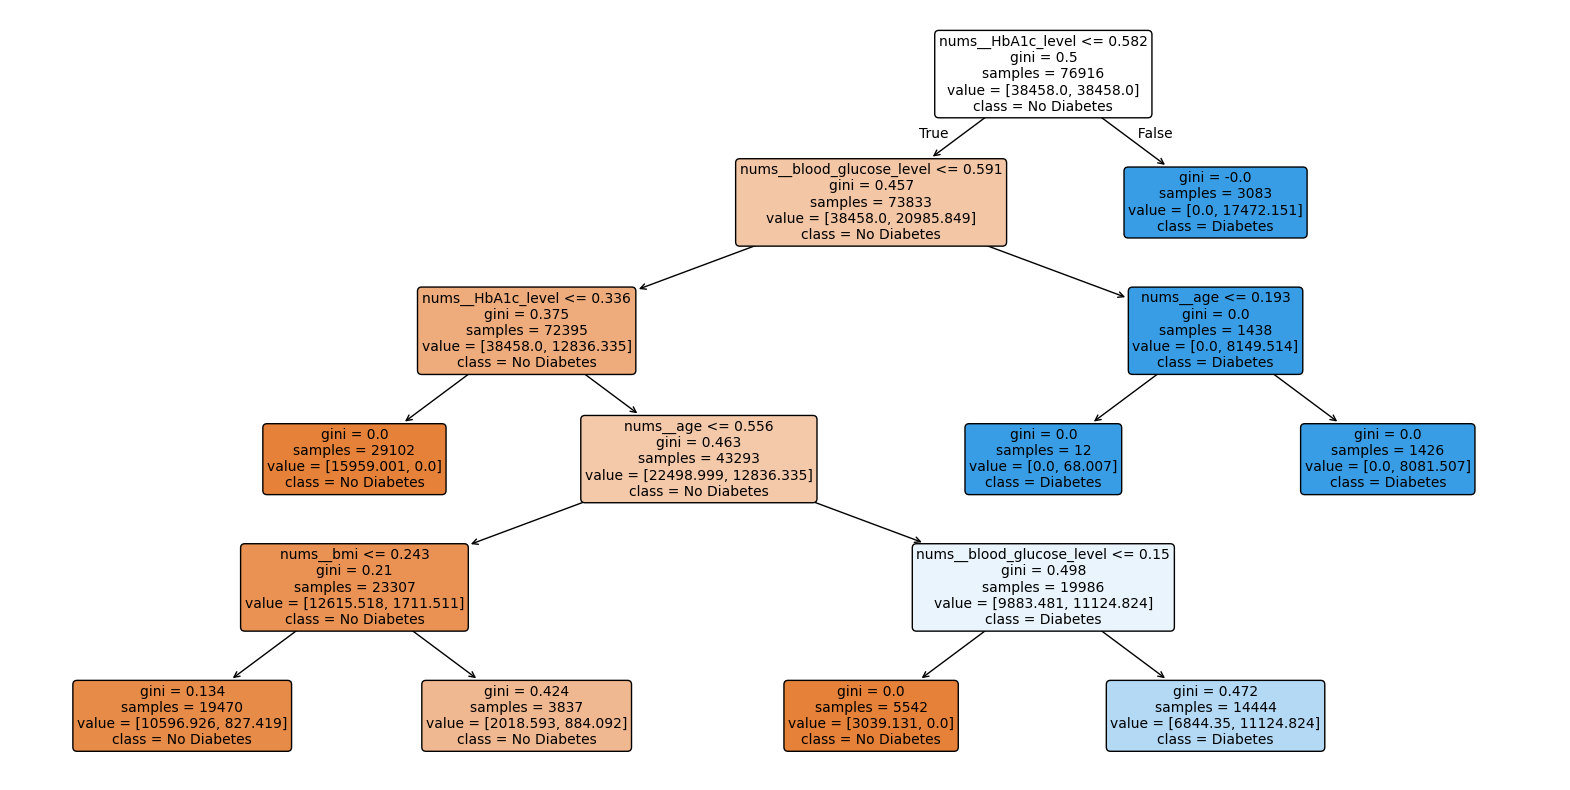

In [85]:
from sklearn.tree import plot_tree
# Extract trained tree from pipeline
tree_model = dt_model_2.named_steps["model"]

plt.figure(figsize=(20,10))
plot_tree(
    tree_model,
    filled=True,
    feature_names=dt_model.named_steps["preprocess"]
                     .get_feature_names_out(),
    class_names=["No Diabetes", "Diabetes"],
    rounded=True,
    fontsize=10
)
plt.show()

CAN THE MODELS VOTE?

Can we try a voting classifier to try to vote decision?

Sometimes using ensemble can imporve model accuracy, reduce errors but can reduce explainability and increase complexity.

In [86]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_features),
        ("bin", "passthrough", bin_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features)
    ]
)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_model_1 = LogisticRegression(
    max_iter=1000,
    C=0.5,
    class_weight="balanced",
    random_state=42
)

tree_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=20,
    random_state=42
)
tree_model_2 = DecisionTreeClassifier (
    class_weight="balanced",
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=20,
    random_state=42
)

In [88]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ("log", log_model_1),
        ("tree", tree_model)
    ],
    voting="soft"  # important for probability averaging
)

voting_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", voting_clf)
])

In [89]:
voting_clf_2 = VotingClassifier(
    estimators=[
        ("log", log_model_1),
        ("tree", tree_model_2)
    ],
    voting="soft"  # important for probability averaging
)

voting_pipeline_2 = Pipeline([
    ("preprocess", preprocessor),
    ("model", voting_clf_2)
])

In [90]:
#RESULTS WITH DTC with clss weights imbalanced
cv_results = cross_validate(
    voting_pipeline,
    X_tr,
    y_tr,
    cv=skf,
    scoring=scoring
)

print("===== Voting Classifier =====\n")

for metric in scoring.keys():
    mean_score = np.mean(cv_results[f"test_{metric}"])
    std_score = np.std(cv_results[f"test_{metric}"])
    print(f"{metric.upper()}: {mean_score:.4f} (+/- {std_score:.4f})")

===== Voting Classifier =====

ACCURACY: 0.9590 (+/- 0.0012)
PRECISION: 0.7837 (+/- 0.0067)
RECALL: 0.7395 (+/- 0.0114)
F1: 0.7609 (+/- 0.0076)
ROC_AUC: 0.9685 (+/- 0.0013)


In [91]:
#model with classweights balanced in the decision tree
cv_results = cross_validate(
    voting_pipeline_2,
    X_tr,
    y_tr,
    cv=skf,
    scoring=scoring
)

print("===== Voting Classifier =====\n")

for metric in scoring.keys():
    mean_score = np.mean(cv_results[f"test_{metric}"])
    std_score = np.std(cv_results[f"test_{metric}"])
    print(f"{metric.upper()}: {mean_score:.4f} (+/- {std_score:.4f})")

===== Voting Classifier =====

ACCURACY: 0.8819 (+/- 0.0027)
PRECISION: 0.4220 (+/- 0.0059)
RECALL: 0.9145 (+/- 0.0088)
F1: 0.5775 (+/- 0.0057)
ROC_AUC: 0.9704 (+/- 0.0014)


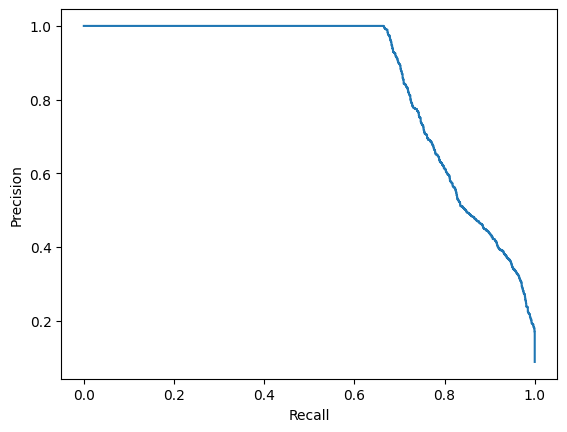

In [92]:
voting_pipeline_2.fit(X_tr, y_tr)
probs = voting_pipeline_2.predict_proba(X_val)[:,1]
precision, recall, thresholds = precision_recall_curve(y_val, probs)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

THE VOTING CLASSIFIER HAS GOOD SCORE there fore our outcome: voting_pipeline_2 is the best classfifier model we have out here

In [93]:
y_proba = voting_pipeline_2.predict_proba(X_val)[:,1]
custom_pred = (y_proba >= 0.1).astype(int)
mo=(confusion_matrix(y_val, custom_pred))
print(mo)

[[11587  5947]
 [   22  1674]]


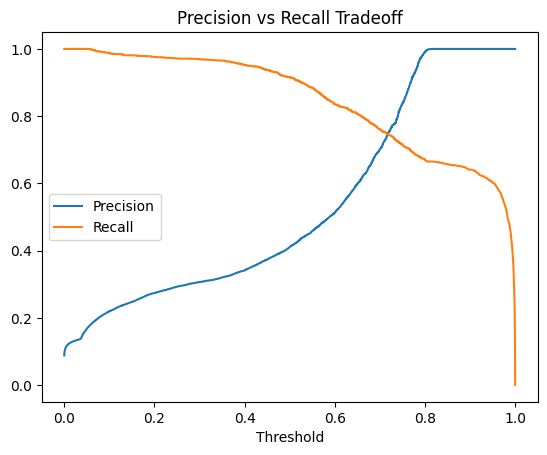

In [94]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
prec, rec, thresh = precision_recall_curve(y_val, y_proba)

plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision vs Recall Tradeoff")
plt.show()

voting_pipeline_2 the voting pipeline has our desired results that needs to be "threshold" fine tuned and finally this model is ready to be deployed for easily.

See we realized a few things especially from PCA KNN analysis and DT, That its actually HbA1C levels and blood glucose elvels play a huge role. Now to find whether our models can have an impact or not on the real arena is it to play it atleast on par to a medical proffessional.

Thumb rule: HbA1c level >= 6.5 -->diabetic? Test this "baseline" rule to see the brutal truth

In [95]:
baseline_pred = (X_val['HbA1c_level'] >= 6.5).astype(int)
print("Clinical Rule (HbA1c >= 6.5%):")
print(f"Accuracy: {accuracy_score(y_val, baseline_pred):.4f}")

Clinical Rule (HbA1c >= 6.5%):
Accuracy: 0.8105


In [98]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [100]:
!git clone https://github.com/visiodepsp-lgtm/mlops-final-project-diabetes.git

Cloning into 'mlops-final-project-diabetes'...


Our model performs better than blind memorization of clinical rule set meaning our model has understood and "learnt" some patterns after all.